In [32]:
from time import time
import numpy as np
import keras.backend as K
from tensorflow.keras.layers import Layer, InputSpec
from keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [143]:
import math

In [146]:
x = np.load(r'C:\Projects\TAU\DL-Workshop\Git Folder\DL-WORKSHOP\npy_files\features_All16.npy')
traj = x[:,:,:2].copy()
traj.shape

(7484, 16, 2)

In [167]:
label = np.load(r'C:\Projects\TAU\DL-Workshop\Git Folder\DL-WORKSHOP\npy_files\labels_All12.npy')
label.shape

(14330,)

In [168]:
pd.Series(label).value_counts()

G4     1867
F4     1697
D7     1604
D3     1477
D4     1316
D2      917
G2      896
E6      818
F3      749
E8      591
G3      498
G5      435
F2      381
E7      371
G6      326
E9      255
E10     132
dtype: int64

In [147]:
y = traj[:,:-1,].copy()
y.shape

(7484, 15, 2)

In [150]:
for j in range(traj.shape[0]):
    for i in range(traj.shape[1]-1):
        y[j,i,0] = (np.sqrt( (traj[j,i+1,1]-traj[j,i,1])**2 + (traj[j,i+1,0]-traj[j,i,0])**2 ))
        y[j,i,1] = np.arctan( (traj[j,i+1,1]-traj[j,i,1])/(traj[j,i+1,0]-traj[j,i,0]) )

C:\Users\asafavra\AppData\Local\Temp\ipykernel_22992\100010063.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  y[j,i,1] = math.atan( (traj[j,i+1,1]-traj[j,i,1])/(traj[j,i+1,0]-traj[j,i,0]) )


In [151]:
traj[0,:,:]

array([[  0.      ,   0.      ],
       [ -5.132004,   1.02059 ],
       [ 11.144676,   0.60886 ],
       [ -2.018394,  -3.55016 ],
       [ -3.045874,   1.77981 ],
       [ -1.466469,  -3.380145],
       [ -6.450284,   3.437726],
       [  2.151346,  -4.89317 ],
       [  9.835216,  -0.441554],
       [  7.227026,  -3.09118 ],
       [  6.574662,  -8.82205 ],
       [  6.402741, -12.45315 ],
       [ 11.814196, -11.968105],
       [  7.506726, -13.33242 ],
       [ 10.829706, -19.947536],
       [  2.376956, -21.0877  ]])

In [152]:
y[0,:,:]

array([[ 5.23250122, -0.1963066 ],
       [16.28188667, -0.02529031],
       [13.80448692,  0.30603506],
       [ 5.42810237, -1.38035833],
       [ 5.39626313, -1.27376278],
       [ 8.44522214, -0.93957118],
       [11.97463431, -0.76941054],
       [ 8.88024455,  0.52509395],
       [ 3.7179528 ,  0.79327884],
       [ 5.76788087,  1.4574509 ],
       [ 3.63516768,  1.52348485],
       [ 5.43314953,  0.08939412],
       [ 4.51836842,  0.306736  ],
       [ 7.40283431, -1.1052854 ],
       [ 8.52929988,  0.13407751]])

In [11]:
traj = x[:,:,:2]

In [108]:
traj[0,:,:].shape

(32, 2)

In [22]:
scaler = StandardScaler()
traj_norm = scaler.fit_transform(traj.reshape(-1, traj.shape[-1])).reshape(traj.shape)

In [23]:
import traj_dist.distance as tdist

In [87]:
def plot_representatives(rep_groups , figsize =(5,10)):
    cmap = cm.get_cmap(name='rainbow')
    l = len(rep_groups[0])
    L = len(rep_groups)
    fig, axs = plt.subplots(l,L, figsize=figsize,sharey=True,sharex=True)
    fig.tight_layout()
    for j,reps in enumerate(rep_groups):
        for i,rep in enumerate(reps):
            axs[i,j].plot(rep[:,0],rep[:,1])
    fig.show()

In [88]:
traj_A = [traj_norm[0,:,:] ,traj_norm[1,:,:],traj_norm[2,:,:] ,traj_norm[3,:,:]]
traj_B = [traj_norm[10,:,:] , traj_norm[11,:,:],traj_norm[12,:,:] , traj_norm[13,:,:]]

In [89]:
traj_A = [traj_norm[0,:,:] ,traj_norm[1,:,:]]
traj_B = [traj_norm[10,:,:] , traj_norm[11,:,:]]

In [90]:
rep_groups = [traj_A,traj_B]

C:\Users\asafavra\AppData\Local\Temp\ipykernel_22992\4106673651.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


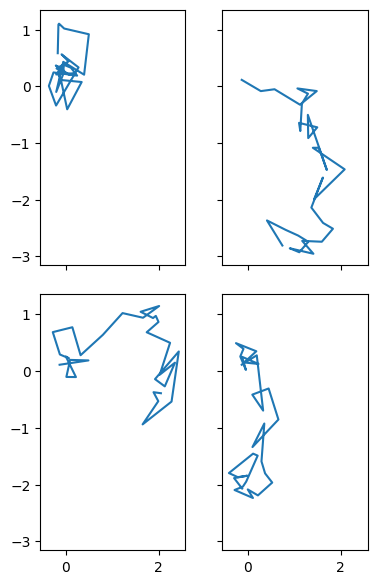

In [92]:
plot_representatives(rep_groups, figsize=(4,6))

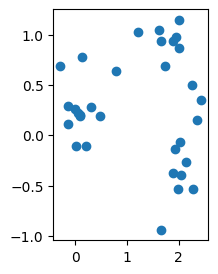

In [107]:
plt.subplots(figsize = (2,3))
plt.scatter(traj_norm[1,:,0],traj_norm[1,:,1])

In [95]:
# plt.subplots(figsize = (2,3))
# plt.plot(traj_norm[10,:,0],traj_norm[10,:,1])


In [97]:
traj_A = traj_norm[0,:,:]
traj_B = traj_norm[10,:,:]

In [98]:
import sklearn
sklearn.metrics.mean_squared_error(traj_A,traj_B)

3.277194185635209

In [99]:
dist = tdist.frechet(traj_A, traj_B)
print(dist)

3.513636939148362


In [100]:
dist = tdist.hausdorff(traj_A, traj_B)
print(dist)

2.8986644482461434


In [101]:
dist = tdist.dtw(traj_A, traj_B)
print(dist)

73.69328350972748


In [102]:
traj_A = traj_norm[10,:,:]
traj_B = traj_norm[11,:,:]

In [103]:
sklearn.metrics.mean_squared_error(traj_A,traj_B)

0.935793774342217

In [104]:
dist = tdist.frechet(traj_A, traj_B)
print(dist)

1.5550991116432744


In [105]:
dist = tdist.hausdorff(traj_A, traj_B)
print(dist)

1.5550991116432744


In [106]:
dist = tdist.dtw(traj_A, traj_B)
print(dist)

37.51429347295684


In [115]:
x = np.array([[0,0],[1,1],[3,3]])

In [116]:
x

array([[0, 0],
       [1, 1],
       [3, 3]])

In [121]:
x[0][1]

0

In [123]:
traj.shape

(4668, 32, 2)

In [135]:
y = traj[0,:-1,:].copy()

In [136]:
y.shape

(31, 2)

In [128]:
import math

In [137]:
x = traj[0,:,:]
for i in range(y.shape[0]-1):
    y[i,0] = (np.sqrt( (x[i+1][1]-x[i][1])**2 + (x[i+1][0]-x[i][0])**2 ))
    y[i,1] = math.atan( (x[i+1][1]-x[i][1])/(x[i+1][0]-x[i][0]) )

In [138]:
x

array([[ 0.       ,  0.       ],
       [ 9.1120926, -0.72662  ],
       [ 3.1325976, -9.90161  ],
       [ 0.3921823,  0.57111  ],
       [-1.003263 ,  2.25294  ],
       [ 5.9441056,  2.11344  ],
       [ 3.7143336,  1.81204  ],
       [ 0.4055834,  3.81564  ],
       [-1.3951804,  1.78484  ],
       [ 1.503746 ,  3.31314  ],
       [-1.5694487,  4.81884  ],
       [ 0.9185033,  3.86104  ],
       [ 2.5079946,  1.95789  ],
       [-1.2642279,  3.836    ],
       [ 3.6965566,  6.19384  ],
       [ 0.8062849,  8.5788   ],
       [ 7.8191056,  4.18794  ],
       [-1.4608944, -8.63656  ],
       [-4.4308944, -2.03656  ],
       [-2.5239177,  2.49834  ],
       [ 7.2421096,  1.42544  ],
       [ 4.6783486,  4.0769   ],
       [ 1.7774391,  5.05514  ],
       [ 1.3611056,  1.63944  ],
       [-1.3938574, -4.06436  ],
       [ 1.5135503,  6.06659  ],
       [10.1145606,  1.73614  ],
       [12.0691056, 15.34149  ],
       [ 1.8761921, 17.2666   ],
       [-0.2453274, 18.89644  ],
       [-0

In [140]:
y.shape

(31, 2)

In [ ]:
from geopy.distance import vincenty
